# Modify Battery Storage Parameters Example
---
In this example, we will show how to modify the battery storage parameters in the hybrid plant simulation. The major change is that instead of using the default dispatch, which is a profit maximization objective function, here we use a load following objective function. The load following objective will minimize system operating costs while [load-following](https://en.wikipedia.org/wiki/Load-following_power_plant).

### Import Required Modules
Begin by importing the necessary modules for the simulation.

In [1]:
import numpy as np

from hopp import ROOT_DIR
from hopp.simulation import HoppInterface
from hopp.utilities import load_yaml
from hopp.simulation.technologies.sites import SiteInfo, flatirons_site
from hopp.tools.dispatch.plot_tools import (
    plot_battery_output, plot_battery_dispatch_error, plot_generation_profile
)


/Users/kbrunik/github/HOPP/examples/log/hybrid_systems_2024-10-25T16.05.59.747238.log


### Set Site Information
Set wind and solar resource data at plant location and load pricing data. In this example, we use the Flatirons site as an example location.



**NOTE**: For a load following objective function the `desired_schedule` must be set. You can also specify `curtailment_value_type` to either _"interconnect_kw"_ or _"desired_schedule"_. If you select _"interconnect_kw"_ the system will curtail energy at the interconnection limit but optimize to meet the `desired_schedule` load and if you select _"desired_schedule"_ it curtails energy above the `desired_schedule` and optimizes to meet the `desired_schedule` load.

In [14]:
DEFAULT_SOLAR_RESOURCE_FILE = ROOT_DIR.parent / "hopp" / "simulation" / "resource_files" / "solar" / "35.2018863_-101.945027_psmv3_60_2012.csv"
DEFAULT_WIND_RESOURCE_FILE = ROOT_DIR.parent / "hopp" / "simulation"  / "resource_files" / "wind" / "35.2018863_-101.945027_windtoolkit_2012_60min_80m_100m.srw"
DEFAULT_PRICE_FILE = ROOT_DIR.parent / "hopp" / "simulation" / "resource_files" / "grid" / "pricing-data-2015-IronMtn-002_factors.csv"

setpoint_kw = float(30 * 1000)
DEFAULT_LOAD = setpoint_kw*np.ones((8760))/1000

site = SiteInfo(
        flatirons_site,
        solar_resource_file=DEFAULT_SOLAR_RESOURCE_FILE,
        wind_resource_file=DEFAULT_WIND_RESOURCE_FILE,
        grid_resource_file=DEFAULT_PRICE_FILE,
        desired_schedule=DEFAULT_LOAD,
        curtailment_value_type="interconnect_kw",
        solar=True,
        wind=True,
        wave=False
    )

### Create the HOPP Model
To generate the HOPP Model, instantiate the `HoppInterface` class and supply the required YAML configuration.

`HOPPInterface` is capable of handling dictionary input as well as class instances. Here we demonstrate this by loading the YAML file as a dict, modifying it to include our site information, then passing it as an argument to `HoppInterface`. This is useful for programmatic configuration of simulation configs.

In [15]:
hopp_config = load_yaml("./inputs/04-load-following-battery.yaml")
# set SiteInfo instance
hopp_config["site"] = site

### Create the Simulation Model
Instantiate the `HoppInterface` class by providing our modified configuration dict.

In [16]:
hi = HoppInterface(hopp_config)

### Run the Simulation
Simulate the hybrid renewable energy system for a specified number of years (in this case, 20 years).

In [17]:
hi.simulate(project_life=25)

### Print Simulation Results
Access and display various simulation results, including annual energies, net present values (NPVs), and total revenues.

In [18]:
hybrid_plant = hi.system

print("Annual Energies (kWh):")
print(hybrid_plant.annual_energies)

print("\n Number of timesteps the load is met:")
print(hybrid_plant.grid.time_load_met)

print("\n Total Missed Load:")
print(sum(hybrid_plant.grid.missed_load), "kWh")

print("\n Percentage of the load that is missed:")
print(hybrid_plant.grid.missed_load_percentage)

Annual Energies (kWh):
{"pv": 104284756.32608213, "wind": 156936144.3525466, "battery": -624679.1263089968, "hybrid": 260596221.5523188}

 Number of timesteps the load is met:
54.71461187214612

 Total Missed Load:
1820949125.6339097 kWh

 Percentage of the load that is missed:
0.27716120633697255


### Visualize Simulation Results (Optional)
Optionally, you can visualize the simulation results using plots. Several functions are provided for plotting battery output, generation profiles, and dispatch errors.

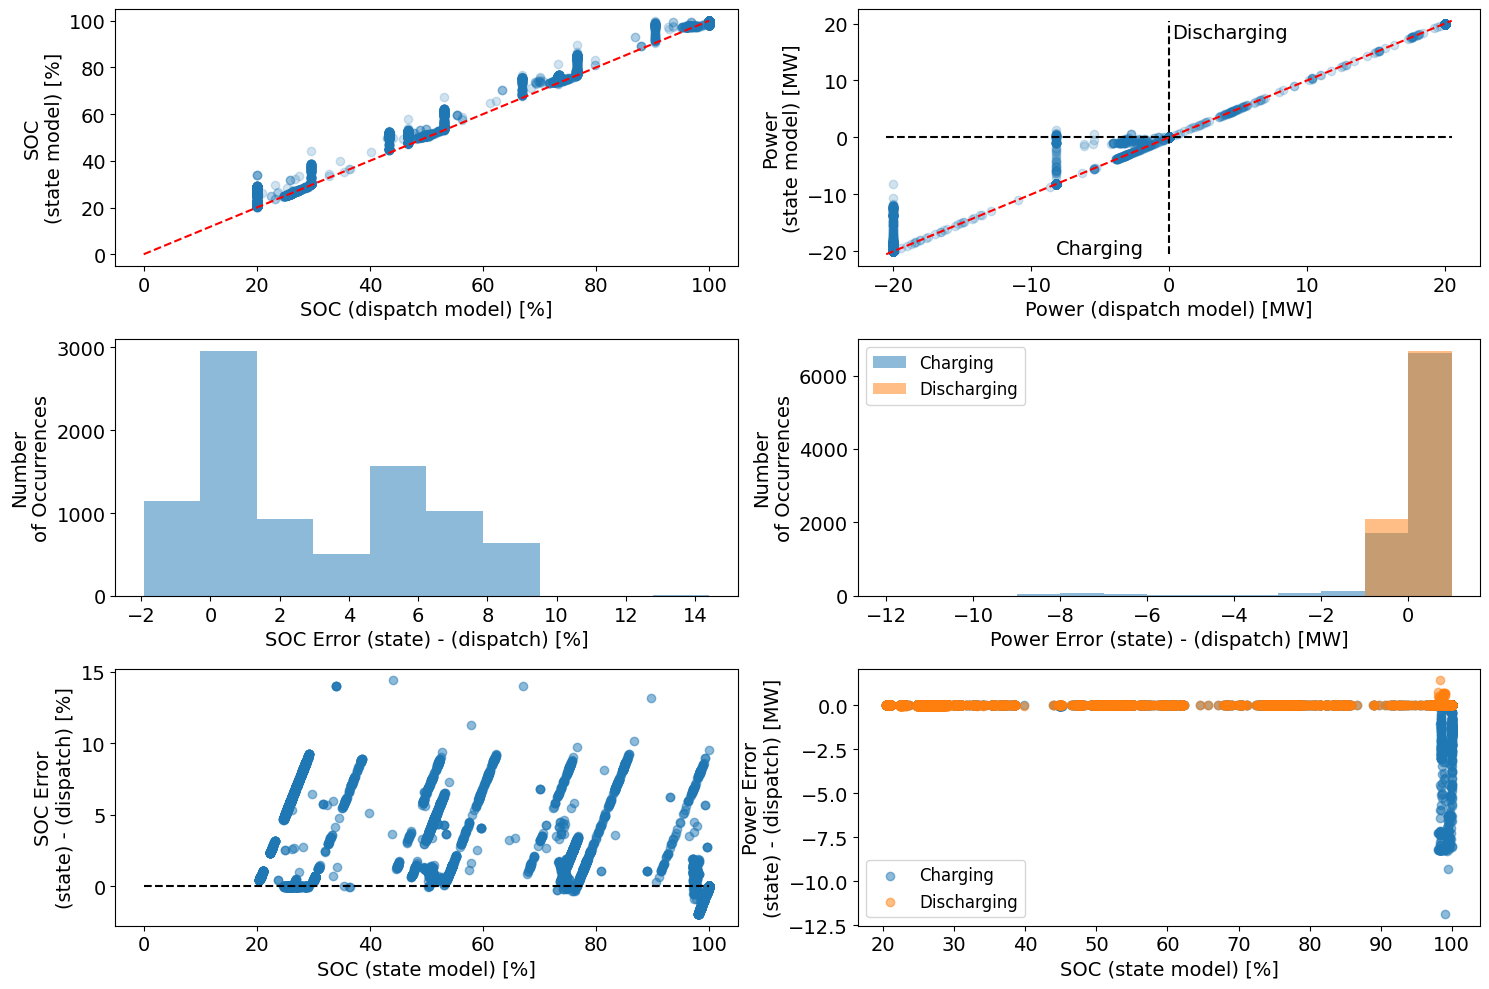

In [19]:
plot_battery_dispatch_error(hybrid_plant)

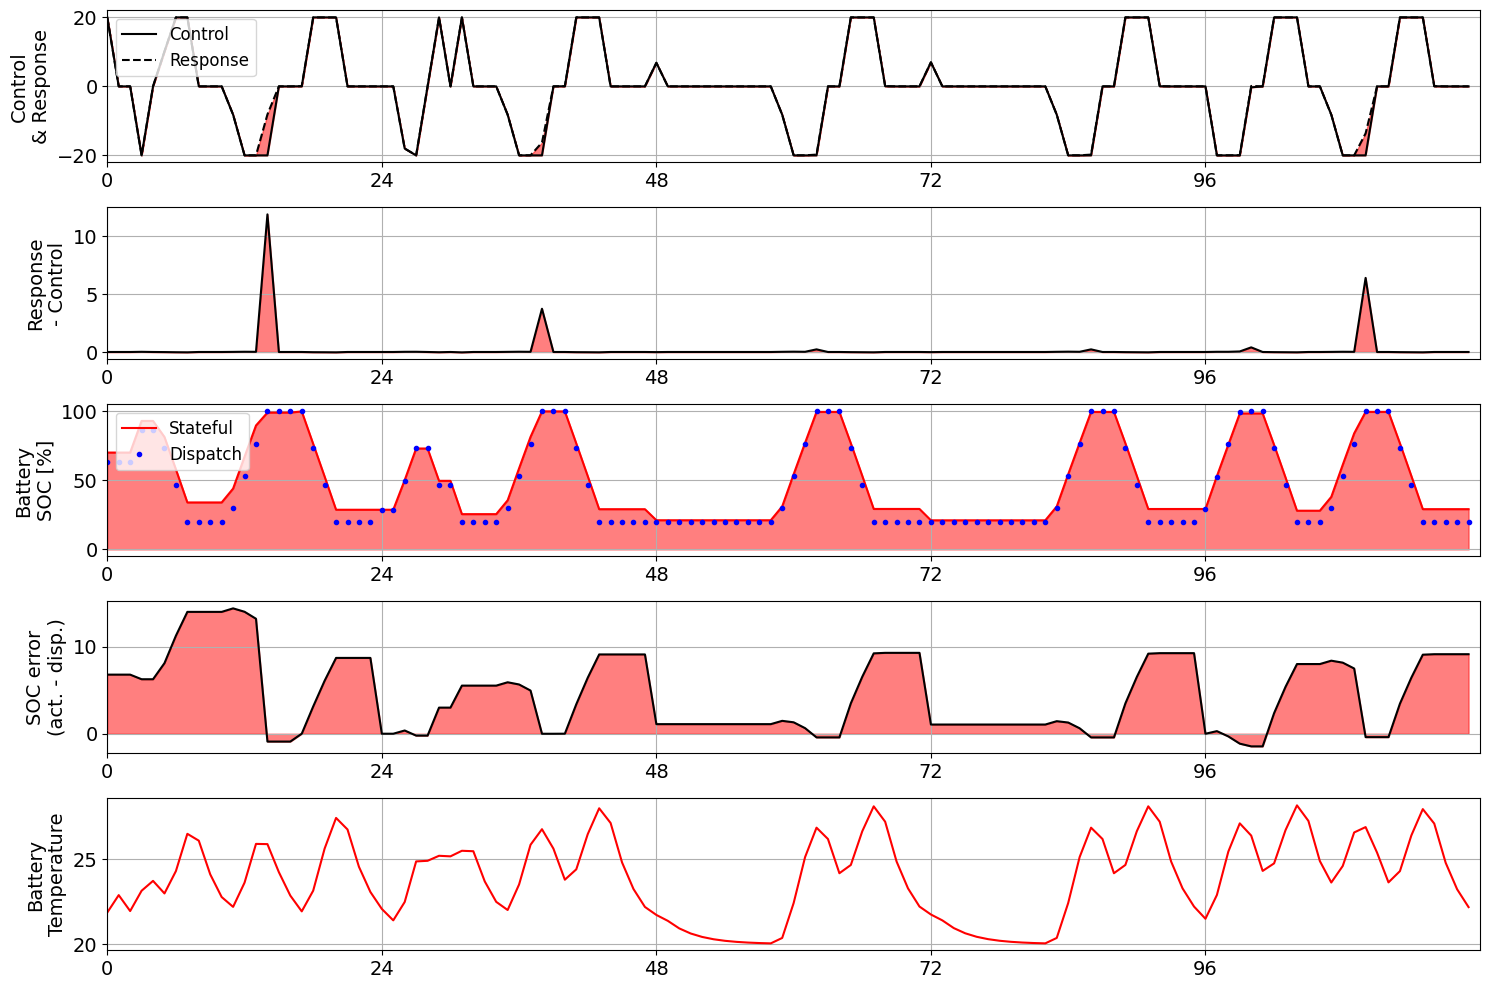

In [20]:
plot_battery_output(hybrid_plant)

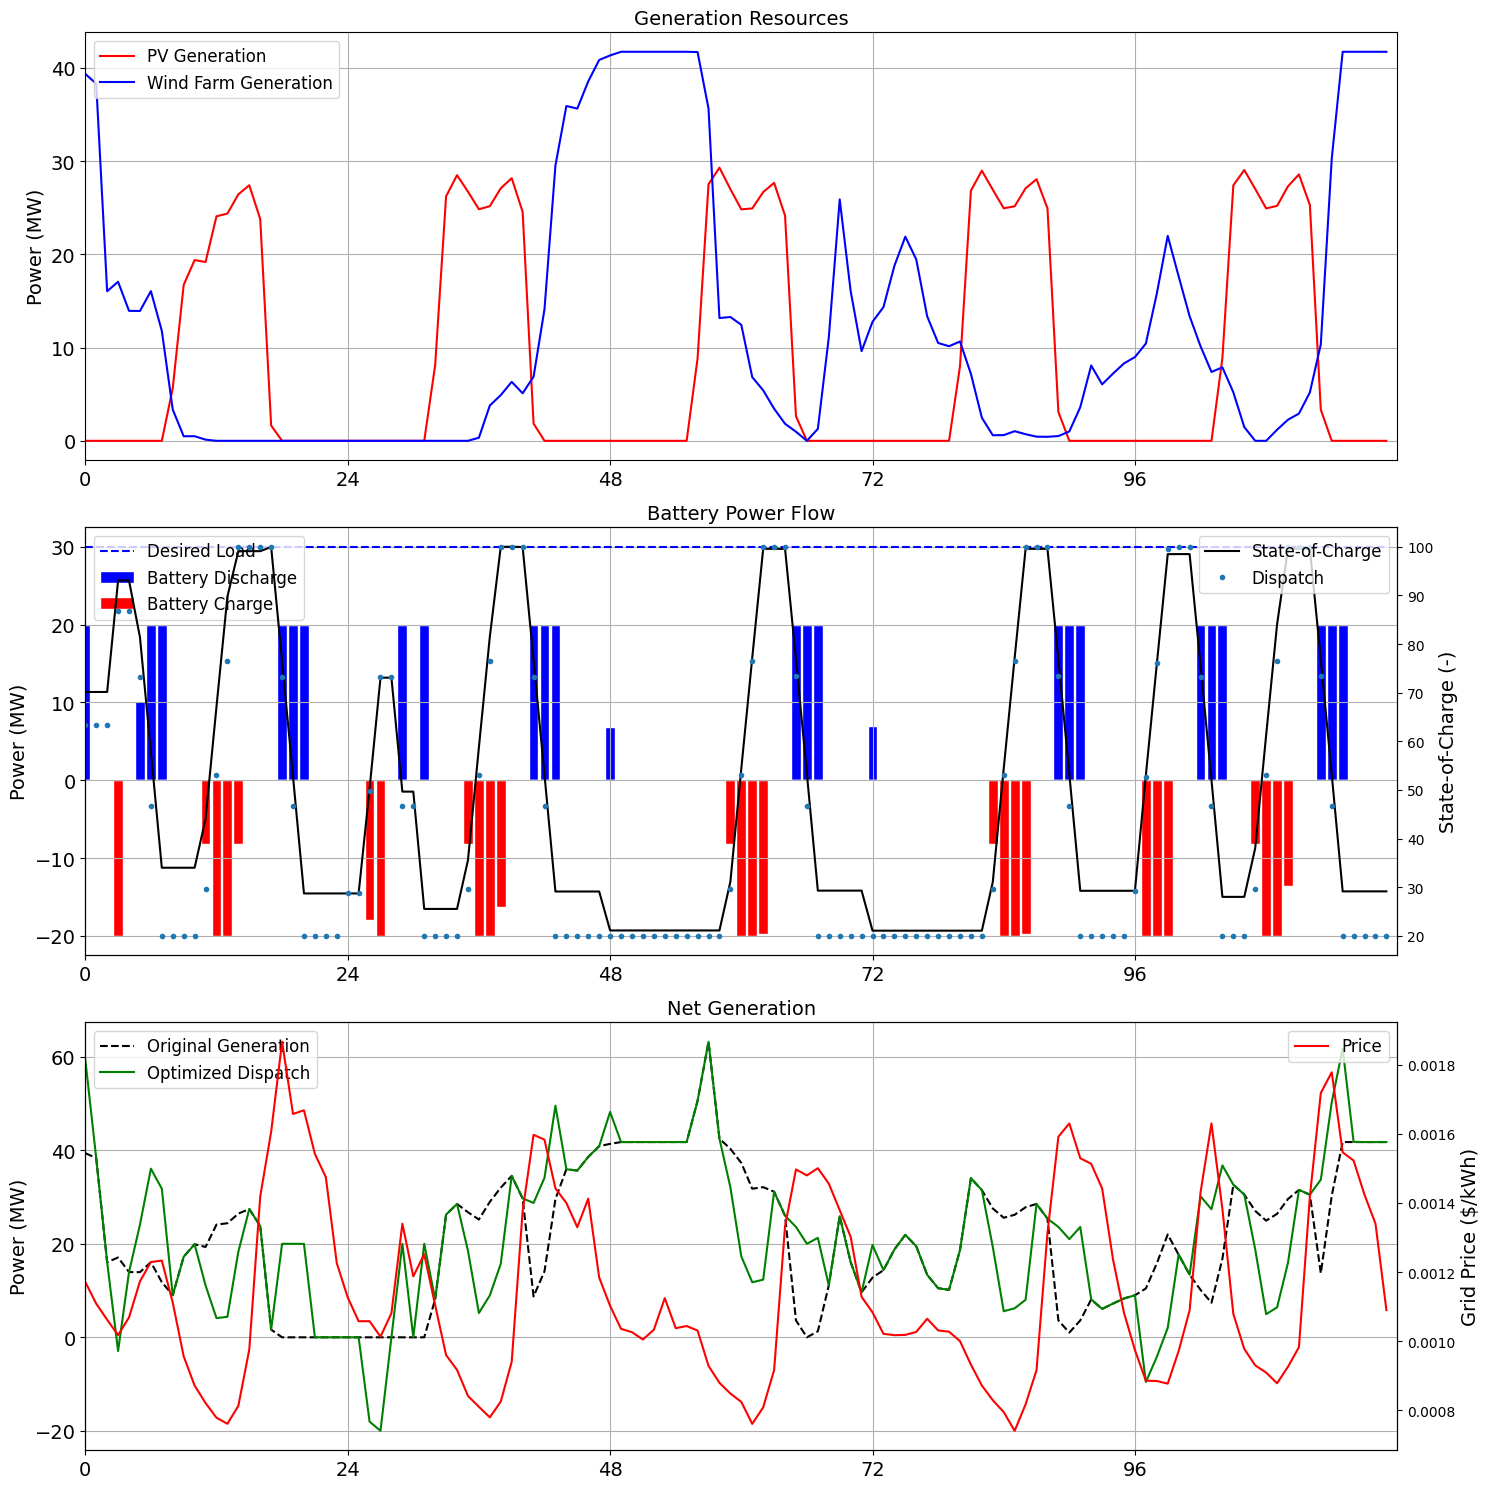

In [21]:
plot_generation_profile(hybrid_plant)